# Project: Computer Vision - Image classification using CNNs in Keras

# **Data Description:**

You are provided with a dataset of images of plant seedlings at various stages of grown. Each image has a filename that is its
unique id. The dataset comprises 12 plant species. The goal of the project is to create a classifier capable of determining a plant's species from a photo.

# **Context:**

Can you differentiate a weed from a crop seedling?
The ability to do so effectively can mean better crop yields and better stewardship of the environment.
The Aarhus University Signal Processing group, in collaboration with University of Southern Denmark, has
recently released a dataset containing images of unique plants belonging to 12 species at several growth stages

# **Objective:**

To implement the techniques learnt as a part of the course.

## Index

- <a href = #link1>1. Load dataset and Summary. (5 marks) </a>


- <a href = #link2>2. Data Pre - Processing. (15 marks) </a> 


- <a href = #link3>3. Data Compatible for Modelling. (10 marks) </a>


- <a href = #link4>4. Build CNN. (15 marks) </a> 


- <a href = #link5>5. Modelling and Evaluation. (10 marks) </a>


- <a href = #link6>6. Visualize Predictions. (5 marks) </a>

## <a id = "link1"></a> 1. Import the libraries, load dataset, print shape of data, visualize the images in dataset. (5 Marks)

####Import Libraries####

In [2]:
import cv2 as cv
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import RMSprop, Adam
from keras.utils.np_utils import to_categorical  #convert to one-hot-encoding

####Load datasets####

In [3]:
# Checking working directory
import os
cwd = os.getcwd()
print (cwd)

C:\Users\bradr\Desktop\AIML Projects


In [4]:
# Load the image file of dataset
images = np.load("images.npy")

# Load the labels file of dataset
labels = pd.read_csv("Labels.csv")

####Shape of data####

In [5]:
print(images.shape)
print(labels.shape)

(4750, 128, 128, 3)
(4750, 1)


####Visualize the images in dataset####

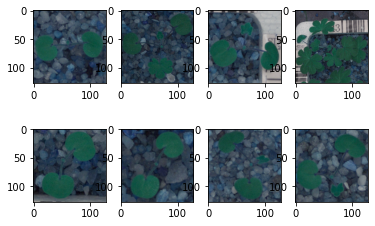

In [11]:
#Example images
for i in range(8):
  plt.subplot(2,4, i + 1)
  plt.imshow(images[i])

## <a id = "link2"></a> 2.	Data Pre-processing: (15 Marks)


b. Gaussian Blurring.

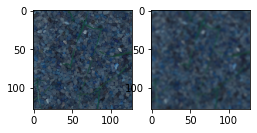

In [6]:
preprocessed_images = []

for img in images:
  blurImg = cv.GaussianBlur (img, (5, 5), 0)

  preprocessed_images.append(blurImg)

plt.subplot(1, 3, 1); plt.imshow(img)
plt.subplot(1, 3, 2); plt.imshow(blurImg)

preprocessed_images = np.asarray(preprocessed_images)

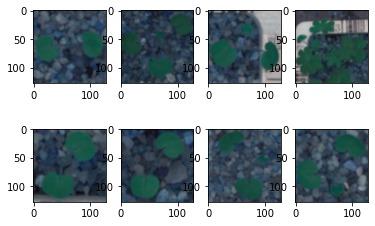

In [7]:
for i in range(8):
  plt.subplot(2,4, i + 1)
  plt.imshow(preprocessed_images[i])

a. Normalization

In [8]:
preprocessed_images = preprocessed_images / 255

## <a id = "link3"></a> 3. Make data compatible: (10 Marks)


####a. Convert Labels to one-hot-vectors####

In [9]:
from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y = enc.fit_transform(labels)

####b. Print the label for y_train[0]####

In [10]:
y[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

####c. Split the dataset into training, testing, and validation set. (Hint: First split images and labels into training and testing set with test_size = 0.3. Then further split test data into test and validation set with test_size = 0.5)####

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(preprocessed_images, y, test_size=0.3, random_state=42)

####d. Check the shape of data, Reshape data into shapes compatible with Keras models if it’s not already. If it’s already in the compatible shape, then comment in the notebook that it’s already in compatible shape.####

In [12]:
X_train = X_train.reshape(X_train.shape[0], 128, 128, 3)
X_test = X_test.reshape(X_test.shape[0], 128, 128, 3)

In [13]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3325, 128, 128, 3)
(3325, 12)
(1425, 128, 128, 3)
(1425, 12)


In [14]:
random_seed = 2
from sklearn.model_selection import train_test_split
X_test, X_val, y_test, Y_val = train_test_split(X_test, y_test, test_size = 0.5, random_state=random_seed)

In [15]:
print(X_test.shape)
print(X_val.shape)

(712, 128, 128, 3)
(713, 128, 128, 3)


## <a id = "link4"></a>4. Building CNN: (15 Marks)

####a. Define layers and set optimizer / loss function. Use Adam optimizer and categorical crossentropy.####

In [16]:
# Set the CNN model

batch_size = None

model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), padding='same', activation="relu", input_shape=(128, 128, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (5, 5), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.GlobalMaxPooling2D())
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(12, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      2432      
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        51264     
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0

In [17]:
optimizer = Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name='Adam')
model.compile(optimizer = optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

In [18]:
history = model.fit(X_train, y_train, epochs = 40, validation_data = (X_val, Y_val), batch_size = batch_size)

Epoch 1/40
104/104 [==============================] - 105s 991ms/step - loss: 3.5518 - accuracy: 0.2000 - val_loss: 2.5115 - val_accuracy: 0.1627
Epoch 2/40
104/104 [==============================] - 100s 964ms/step - loss: 1.8316 - accuracy: 0.3576 - val_loss: 2.6407 - val_accuracy: 0.1304
Epoch 3/40
104/104 [==============================] - 97s 934ms/step - loss: 1.6314 - accuracy: 0.4220 - val_loss: 2.6969 - val_accuracy: 0.1374
Epoch 4/40
104/104 [==============================] - 96s 925ms/step - loss: 1.4875 - accuracy: 0.4872 - val_loss: 2.3874 - val_accuracy: 0.2230
Epoch 5/40
104/104 [==============================] - 96s 925ms/step - loss: 1.4013 - accuracy: 0.5179 - val_loss: 1.9601 - val_accuracy: 0.3086
Epoch 6/40
104/104 [==============================] - 97s 936ms/step - loss: 1.3264 - accuracy: 0.5501 - val_loss: 1.7374 - val_accuracy: 0.4025
Epoch 7/40
104/104 [==============================] - 96s 926ms/step - loss: 1.2685 - accuracy: 0.5693 - val_loss: 1.9128 - val_

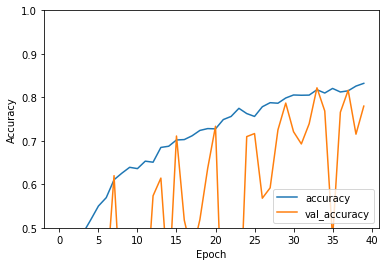

In [19]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right');

## <a id = "link6"></a>5. Fit and evaluate model and print confusion matrix. (10 Marks)


In [20]:
score = model.evaluate(X_test, y_test, verbose=0, batch_size = 38)
print ('Test loss:', score[0])
print ('Test accuracy;', score[1])

Test loss: 0.6315798759460449
Test accuracy; 0.7893258333206177


### Confusion Matrix

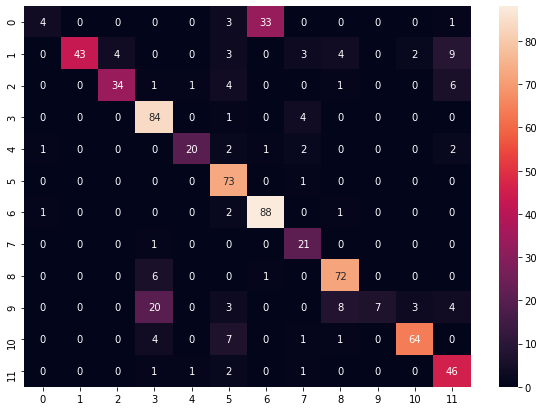

In [21]:
Y_pred = model.predict(X_val)
result = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(Y_val, axis=1)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(Y_true, result)

df_cm = pd.DataFrame(conf_mat, index = [i for i in range(0, 12)])

plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g');

## <a id = "link5"></a>6. Visualize predictions for x_test[2], x_test[3], x_test[33], x_test[36], x_test[59]. (5 Marks)


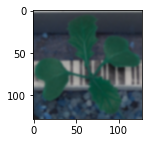

Predicted Label 10
True Label 1


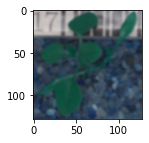

Predicted Label 3
True Label 3


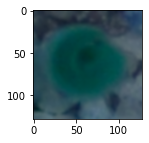

Predicted Label 7
True Label 7


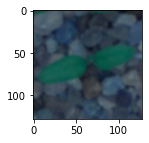

Predicted Label 3
True Label 3


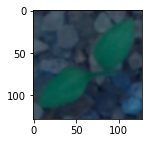

Predicted Label 3
True Label 3


In [22]:
import numpy as np

plt.figure(figsize=(2, 2))
plt.imshow(X_test[3], cmap="gray")
plt.show()
print('Predicted Label', np.argmax(model.predict(X_test[3].reshape(1,128,128,3))))
print('True Label', np.argmax(y_test[3]))

plt.figure(figsize=(2, 2))
plt.imshow(X_test[2], cmap="gray")
plt.show()
print('Predicted Label', np.argmax(model.predict(X_test[2].reshape(1,128,128,3))))
print('True Label', np.argmax(y_test[2]))

plt.figure(figsize=(2, 2))
plt.imshow(X_test[33], cmap="gray")
plt.show()
print('Predicted Label', np.argmax(model.predict(X_test[33].reshape(1,128,128,3))))
print('True Label', np.argmax(y_test[33]))

plt.figure(figsize=(2, 2))
plt.imshow(X_test[59], cmap="gray")
plt.show()
print('Predicted Label', np.argmax(model.predict(X_test[59].reshape(1,128,128,3))))
print('True Label', np.argmax(y_test[59]))

plt.figure(figsize=(2, 2))
plt.imshow(X_test[36], cmap="gray")
plt.show()
print('Predicted Label', np.argmax(model.predict(X_test[36].reshape(1,128,128,3))))
print('True Label', np.argmax(y_test[36]))

- Most recent file 28 Dec 21